# CSCI7000 - Mathematical & Computational Modeling of Infectious Diseases
## Homework 1
- Author: Corey Lynn Murphey
- Instructor: Prof. Dan Larremore
- Deadline: 2 February 2023

Please note that discussion-based problems are not included in this notebook. You can find those responses in the homework PDF. 

## Libraries Imported

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math

## Problem 1
Write a function in Python that uses the Forward Euler method to simulate the SIR model. Check your
work by first reproducing the three plots from Figure 1 of the Week 2 lecture notes. The parameters
are: $N$ = 1000, $I_0$ = 1, $S_0$ = 999, with : 
- $\beta$ = 1, $\gamma$= 0.5
- $\beta$= 1.5,  $\gamma$= 0.5
- $\beta$ = 2, 
 $\gamma$= 0.5
 
Show that your code works by simply reproducing the plots exactly, but with your first name included
in the legend labels, e.g. “S Dan”, “I Dan” or something. Link to your code and turn in simply the 3
plots.

In [2]:
# forward Euler step
def step(deltat, y_old, t_old, dydt):
    y_new = deltat*dydt + y_old # new y value
    t_new = t_old + deltat # new t value
    return y_new, t_new

# not generalized. Specifically a forward Euler solver 
#     for our SIR equation
def forwardEulerSIR(IC, dt, t_max, coeffs):
    N_pop, beta, gamma = coeffs
    s0, i0, r0 = IC
    
    # initialize
    ts = np.arange(0, t_max, dt) # create the time array between 0 - t_max
    n = ts.size # number of time steps
    s = np.zeros(n)
    i = np.zeros(n)
    r = np.zeros(n)

    # initial conditions
    s[0] = s0
    i[0] = i0
    r[0] = r0
    
    # loop, forwardEuler
    for j in range(n-1): 
        # compute the derivative at the last time step
        sp, ip, rp = SIR_Deriv(s[j], i[j], r[j], N_pop, beta, gamma)
        
        # compute next step forward
        s[j+1], t_new = step(dt, s[j], ts[j], sp)
        i[j+1], t_new = step(dt, i[j], ts[j], ip)
        r[j+1], t_new = step(dt, r[j], ts[j], rp)
        
    return s, i, r, ts

# function that returns the derivative for \dot{s}, \dot{i}, and \dot{r}
def SIR_Deriv(s, i, r, N, beta, gamma):
    sp = -beta*s*i/N 
    ip = beta*s*i/N - gamma*i
    rp = gamma*i
    return sp, ip, rp

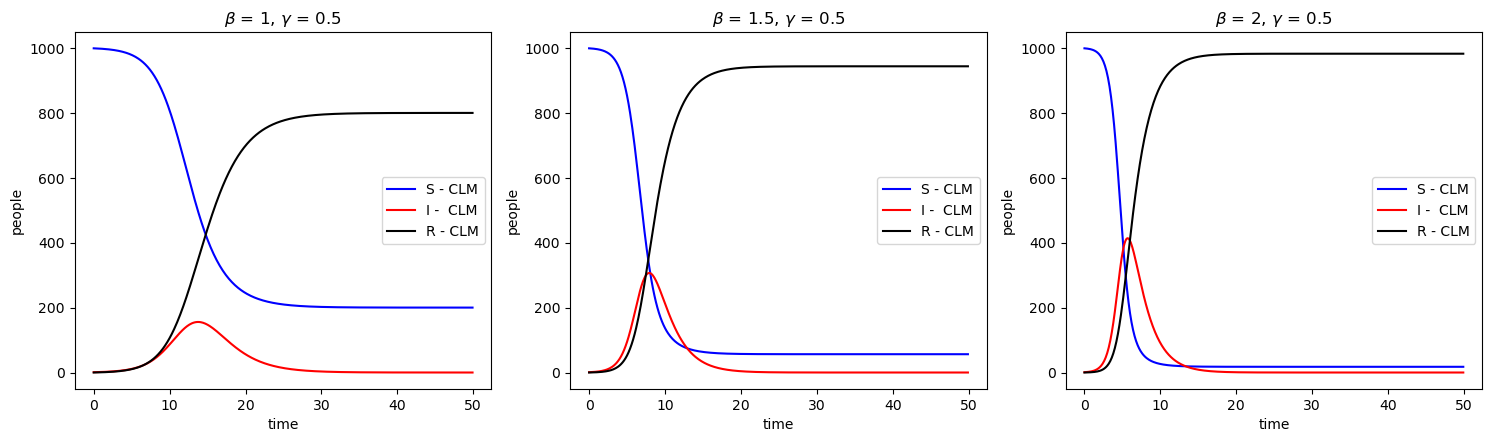

In [3]:
# parameters
N = 1000 # population
I_0 = 1 #initial infection
S_0 = 999 # initial susceptible
R_0 = 0 # number of initial recovereds

dt = 0.1 # time step
t_max = 50 # maximum time

# coefficients, as arrays so we can loop over values
betas = [1, 1.5, 2]
gammas = [0.5,0.5,0.5]

IC = [S_0, I_0, R_0] #initial conditions

#initialize the plotting
fig, ax = plt.subplots(1,3, figsize = (15,4.5))

# loop over the beta and gamma coefficient values
for x in range(3):
    coeffs = [N, betas[x], gammas[x]]
    
    # solve the SIR system of eqns with our forward Euler function above
    s, i, r, t = forwardEulerSIR(IC, dt, t_max, coeffs)
    
    # plot 
    ax[x].plot(t, s,'b', t, i, 'r', t, r, 'k')
    ax[x].legend(('S - CLM', 'I -  CLM', 'R - CLM'), loc='center right')
    ax[x].set_xlabel('time')
    ax[x].set_ylabel('people')
    ax[x].set_title(r'$\beta$ = {}, $\gamma$ = {}'.format(betas[x], gammas[x]))

#pad the figure
fig.tight_layout(pad=1.0)
#save the figure
plt.savefig('my_sir.png')

## Problem 2
This is a discussion/mathematical problem. You can find that discussion in the main PDF. 

## Problem 3
The goal of this problem is to (i) figure out how to solve the final epidemic size equation, and (ii) test
the equation’s predictions.

### Part 3.b
b. Recall that r1 = 1 􀀀 e􀀀R0r1. Though we can’t solve this equation, we can use a valuable graphical technique: if we set f(r1) = r1 and g(r1) = 1 􀀀 e􀀀R0r1, we can plot both f(r1)
vs r1 and g(r1) vs r1, and see where f = g. Create four plots for R0 2 f0:9; 1:0; 1:1; 1:2g
with f in black and g in red. Use the fsolve function to find the intersection point, and use
matplotlib’s scatter function to plot a blue circle at the intersection.1


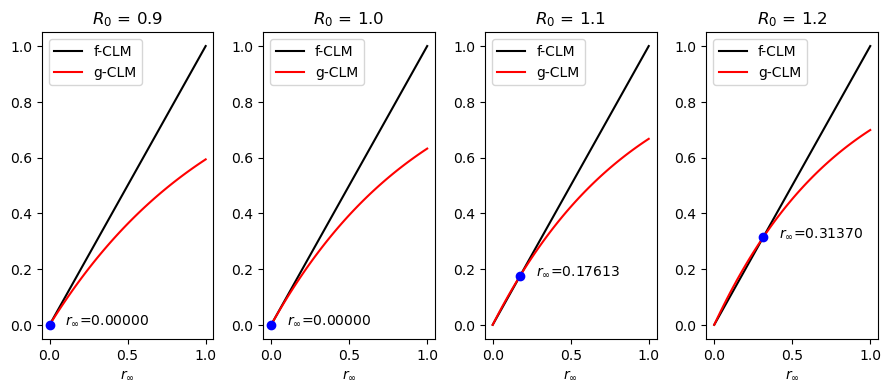

In [4]:
R_0s = [0.9, 1.0, 1.1, 1.2]

# guesses for where our intersections are
guesses = [0, 0, .15, .4]

# range of r_inf to look at (0 - 1)
r_inf=np.linspace(0,1)

fig, ax = plt.subplots(1,4, figsize = (9,4))

def intersection(f,g,guess):
    # find the intersection (where the difference between the functions is zero)
    # note, we need to define an anonymous function (denoted by lambda here)
    return sp.optimize.fsolve(lambda rloc: f(rloc)-g(rloc), guess)
    
for j in range(4):
    R_0 = R_0s[j]
    
    # define the functions, inside the loop because we need to update R_0 every time
    def f(r_inf):
        return  r_inf

    def g(r_inf):
        return 1 - np.exp(-R_0*r_inf)

    # evaluate the functions so we can plot them...
    f2 = f(r_inf)
    g2 = g(r_inf)
    
    # compute the intersection
    intersect = intersection(f,g,guesses[j])

    #plot
    ax[j].plot(r_inf, f2, 'black', r_inf, g2, 'red')
    ax[j].legend(('f-CLM', 'g-CLM'), loc='upper left', fontsize=10)
    ax[j].set_title(r'$R_0$ = {}'.format(R_0))
    ax[j].plot(intersect, f(intersect),'bo')
    ax[j].set_xlabel(r'$r_\infty$')
    #round to 5 decimal places
    ax[j].annotate(r'$r_\infty$={:.5f}'.format(float(intersect)), (float(intersect)+0.1, f(float(intersect))))
        
fig.tight_layout(pad=1.0)
plt.savefig('my_rInf.png')

### Part 3.d
d. Finally, test the predictions made by this final-size equation by using your SIR code and   $\beta$ = 1, $\gamma$ = 0:5 by creating a new version of that epidemic with a green dotted line at the height of $r_\infty$.
Does this final size prediction work?

In [5]:
# parameters
N = 1000 # population
I_0 = 1 #initial infection
S_0 = 999 # initial susceptible
R_0 = 0 # number of initial recovereds

dt = 0.1 # time step
t_max = 50 # maximum time

# coefficients, as arrays so we can loop over values
betas = [1]
gammas = [.5]

IC = [S_0, I_0, R_0] #initial conditions

We need to calculate the basic reproductive number based on the given beta and gamma. Remember: 
$$R_0 = \frac{\beta}{\gamma}$$

Also remember that $R_0$ is not our initial recovered value. It's the basic reproductive number.

In [6]:
#calculate new R_0 (not the recovered initials! The basic reproductive number)
r_naught = betas[0]/gammas[0]
print("The basic reproductive number is : {}".format(r_naught))

The basic reproductive number is : 2.0


In [7]:
# define the functions, inside the loop because we need to update R_0 every time
def f(r_inf):
    return  r_inf

def g(r_inf):
    return 1 - np.exp(-r_naught*r_inf)

# evaluate the functions so we can plot them...
f2 = f(r_inf)
g2 = g(r_inf)

# compute the intersection (r_inf) given a reasonable guess at the intersection
intersect = intersection(f,g,guesses[j])

horizLineR_inf = intersect*np.ones(t.size)*N

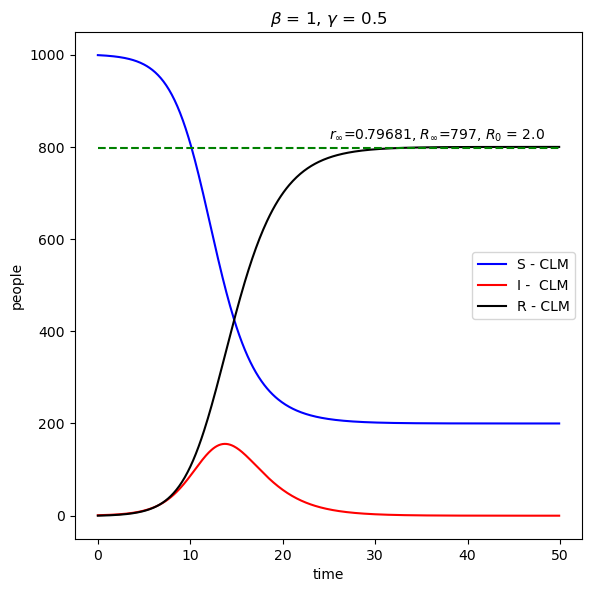

In [8]:
#initialize the plotting
fig, ax = plt.subplots(1,1, figsize = (6,6))

# loop over the beta and gamma coefficient values
coeffs = [N, betas[0], gammas[0]]

# solve the SIR system of eqns with our forward Euler function above
s, i, r, t = forwardEulerSIR(IC, dt, t_max, coeffs)

# plot 
ax.plot(t, s,'b', t, i, 'r', t, r, 'k')
ax.plot(t,horizLineR_inf, 'g--')
ax.legend(('S - CLM', 'I -  CLM', 'R - CLM'), loc='center right')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.set_title(r'$\beta$ = {}, $\gamma$ = {}'.format(betas[0], gammas[0]))
ax.annotate(r'$r_\infty$={:.5f}, $R_\infty$={:.0f}, $R_0$ = {:.1f}'.format(float(intersect),\
                                        float(intersect*N), r_naught), (25, intersect*N+20))


#pad the figure
fig.tight_layout(pad=1.0)
#save the figure
plt.savefig('labeledSir.png')